In [1]:

# DFT analyse task
#
# 	1) generate sinusoidal and periodic triangular signals of various frequencies, and analyse amplitude spectrum
#
# 	2) pronounce any vowel sound(s) and record your voice, convert recording to 16 bit wav, and
# 	analyse spectrum of your voice (find main frequencies of your voice)
#
# below you can see the implementation of sinusoidal signal

import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.signal as signal


def write_audio(path, sr, data):
	# path: the path of output file,
	# sr: sampling rate
	# data: the audio waveform data
	data = data.astype('int16')
	wavfile.write(path, sr, data)
	return None

#--------generating signal ------------------------------------
def gen_sinusoid(freq, duration, sample_rate, amplitude):
	N = duration * sample_rate
	t_samples = np.arange(N)
	omega = 2 * np.pi * freq / sample_rate # angular frequency 
	sinusoid = amplitude * np.sin(omega * t_samples) # sinusoidal signal
	return sinusoid

def gen_triangular(freq, duration, sample_rate, amplitude):
	N = duration * sample_rate
	t_samples = np.arange(N)
	omega = 2 * np.pi * freq / sample_rate # angular frequency 
	triangular = amplitude*signal.sawtooth(omega * t_samples, width=0.5)
	return triangular

#-------------- visualising amplitude spectrum -----------------
def plot_ampl_spectr(data, sr):
    N = len(data)
    coefs = np.fft.rfft(data)
    amplitude_spectr = np.abs(coefs)
    freqs = np.fft.rfftfreq(N, 1/sr)

    plt.plot(freqs, amplitude_spectr)
    plt.xlabel('freqs in hz')
    plt.ylabel('amplitudes')
    plt.show()


def plot_waveform(data, sampling_frequency=None):
    sampling_period = 1 / sampling_frequency 
    time_points = sampling_period * np.arange(len(data)) 
    plt.plot(time_points, data) 
    plt.ylabel('amplitude') 
    plt.xlabel('time')
    plt.show()

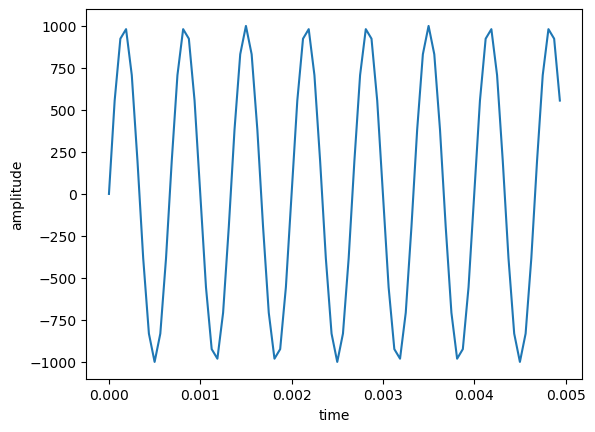

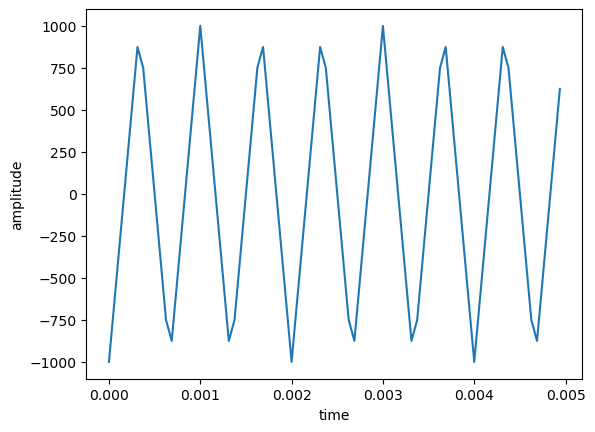

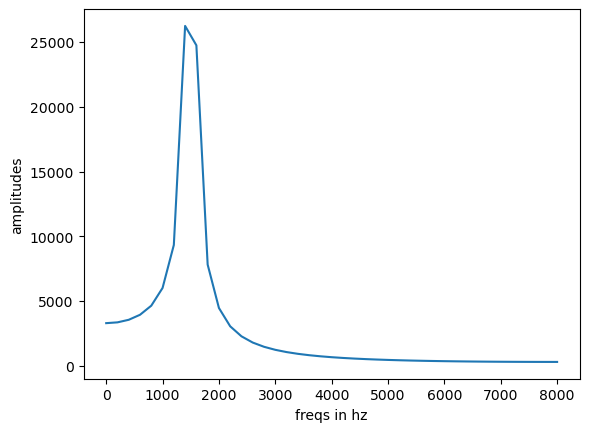

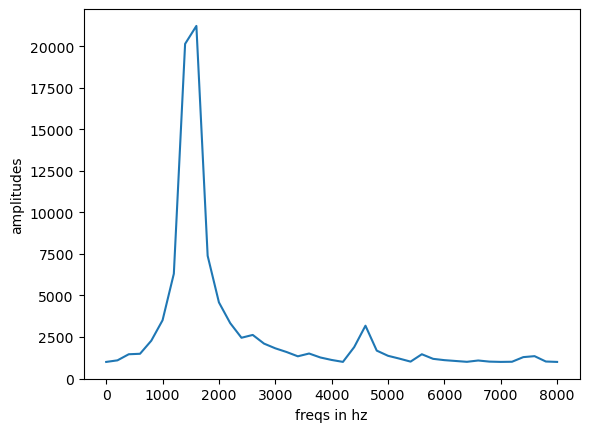

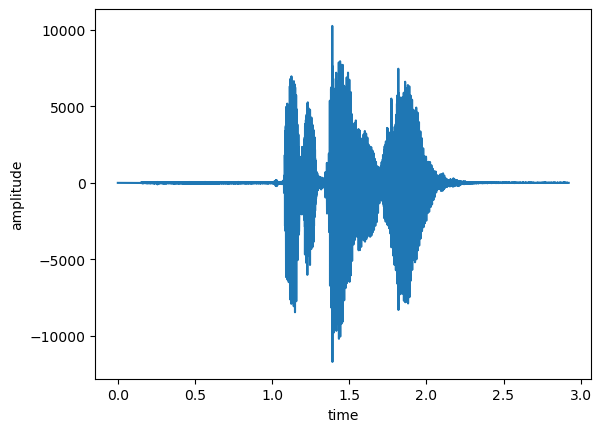

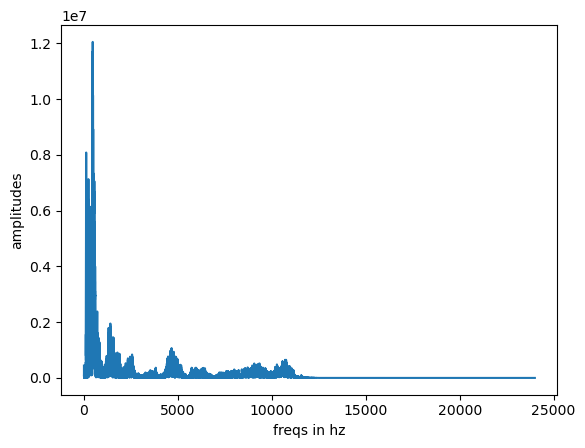

In [2]:
#--------- parameters -----------------------------------------
file_name = 'sinusoid.wav'
sample_rate = 16000 # hz
freq = 1500 # hz
amplitude = 1000
duration = 0.005 # secs
# generating some signals
sin_s = gen_sinusoid(freq, duration, sample_rate, amplitude)
tri = gen_triangular(freq, duration, sample_rate, amplitude)

write_audio(file_name, sample_rate, sin_s)
# # signal = rand_signal
# # plotting amplitude spectrum, here you can manipulate signal, db_scale of y in plot etc. 
plot_waveform(sin_s, sample_rate)
plot_waveform(tri, sample_rate)
plot_ampl_spectr(sin_s, sample_rate)
plot_ampl_spectr(tri, sample_rate)

sr, s = wavfile.read('recording.wav')
s = s[:, 0]
plot_waveform(s, sr)
plot_ampl_spectr(s, sr)